In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [2]:
  n_pts = 100
  centers = [[-0.5, 0.5], [0.5, -0.5]]
  X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)
  
  x_data = torch.Tensor(X)
  y_data = torch.Tensor(y.reshape(100, 1))
  print(y.shape)

(100,)


In [3]:
def scatter_plot():
    plt.scatter(X[y==0, 0], X[y==0, 1]) # Blue
    plt.scatter(X[y==1, 0], X[y==1, 1]) # Orange

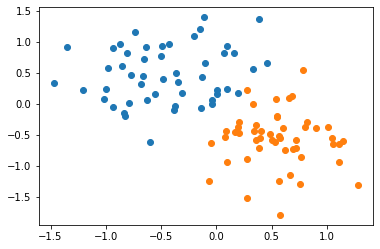

In [4]:
scatter_plot()

In [5]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
      super().__init__() 
      self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
      pred = torch.sigmoid(self.linear(x))
      return pred
    def predict(self, x):
      pred = self.forward(x)
      if pred >= 0.5:
        return 1
      else:
        return 0

In [6]:
torch.manual_seed(2)
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [7]:
[w, b] = model.parameters()
w1, w2 = w.view(2)
def get_params():
  return (w1.item(), w2.item(), b[0].item())

In [8]:
def plot_fit(title):
    plt.title = title
    w1, w2, b1 = get_params()
    x1 = np.array([-2.0, 2.0])
    x2 = -1*(w1*x1 + b1)/w2
    scatter_plot()
    plt.plot(x1, x2, 'r')
    plt.show()

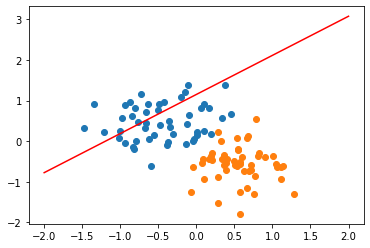

In [9]:
plot_fit('Initial Model')

In [10]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [11]:
epochs = 1000
losses = []

for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print("epoch:", i, "loss:", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 0.6185115575790405
epoch: 1 loss: 0.617464005947113
epoch: 2 loss: 0.6164200305938721
epoch: 3 loss: 0.6153795123100281
epoch: 4 loss: 0.6143423914909363
epoch: 5 loss: 0.6133086681365967
epoch: 6 loss: 0.6122783422470093
epoch: 7 loss: 0.6112514734268188
epoch: 8 loss: 0.6102279424667358
epoch: 9 loss: 0.6092078685760498
epoch: 10 loss: 0.6081911325454712
epoch: 11 loss: 0.6071776747703552
epoch: 12 loss: 0.606167733669281
epoch: 13 loss: 0.6051609516143799
epoch: 14 loss: 0.604157567024231
epoch: 15 loss: 0.6031573414802551
epoch: 16 loss: 0.6021605730056763
epoch: 17 loss: 0.6011670231819153
epoch: 18 loss: 0.6001767516136169
epoch: 19 loss: 0.599189817905426
epoch: 20 loss: 0.5982059240341187
epoch: 21 loss: 0.5972253680229187
epoch: 22 loss: 0.5962480306625366
epoch: 23 loss: 0.5952739119529724
epoch: 24 loss: 0.5943029522895813
epoch: 25 loss: 0.5933352112770081
epoch: 26 loss: 0.5923706293106079
epoch: 27 loss: 0.5914091467857361
epoch: 28 loss: 0.5904508829116821

epoch: 330 loss: 0.40165916085243225
epoch: 331 loss: 0.40126025676727295
epoch: 332 loss: 0.40086233615875244
epoch: 333 loss: 0.4004655182361603
epoch: 334 loss: 0.40006953477859497
epoch: 335 loss: 0.39967459440231323
epoch: 336 loss: 0.3992806375026703
epoch: 337 loss: 0.39888760447502136
epoch: 338 loss: 0.3984955847263336
epoch: 339 loss: 0.3981045186519623
epoch: 340 loss: 0.39771437644958496
epoch: 341 loss: 0.3973252475261688
epoch: 342 loss: 0.3969370126724243
epoch: 343 loss: 0.3965497314929962
epoch: 344 loss: 0.3961634337902069
epoch: 345 loss: 0.3957780599594116
epoch: 346 loss: 0.39539361000061035
epoch: 347 loss: 0.3950101137161255
epoch: 348 loss: 0.39462754130363464
epoch: 349 loss: 0.3942459225654602
epoch: 350 loss: 0.3938651978969574
epoch: 351 loss: 0.393485426902771
epoch: 352 loss: 0.3931065499782562
epoch: 353 loss: 0.3927285373210907
epoch: 354 loss: 0.39235153794288635
epoch: 355 loss: 0.39197537302970886
epoch: 356 loss: 0.391600102186203
epoch: 357 loss: 0.

epoch: 798 loss: 0.2837629020214081
epoch: 799 loss: 0.28360411524772644
epoch: 800 loss: 0.2834455966949463
epoch: 801 loss: 0.28328737616539
epoch: 802 loss: 0.28312933444976807
epoch: 803 loss: 0.2829716205596924
epoch: 804 loss: 0.282814085483551
epoch: 805 loss: 0.28265678882598877
epoch: 806 loss: 0.2824997305870056
epoch: 807 loss: 0.2823430001735687
epoch: 808 loss: 0.2821864187717438
epoch: 809 loss: 0.2820301353931427
epoch: 810 loss: 0.2818741202354431
epoch: 811 loss: 0.28171828389167786
epoch: 812 loss: 0.2815626859664917
epoch: 813 loss: 0.2814073860645294
epoch: 814 loss: 0.28125226497650146
epoch: 815 loss: 0.2810974419116974
epoch: 816 loss: 0.28094282746315
epoch: 817 loss: 0.280788391828537
epoch: 818 loss: 0.2806342840194702
epoch: 819 loss: 0.28048038482666016
epoch: 820 loss: 0.2803267240524292
epoch: 821 loss: 0.28017327189445496
epoch: 822 loss: 0.2800200879573822
epoch: 823 loss: 0.27986711263656616
epoch: 824 loss: 0.2797144055366516
epoch: 825 loss: 0.2795619

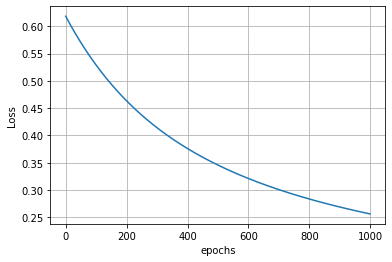

In [12]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.grid()

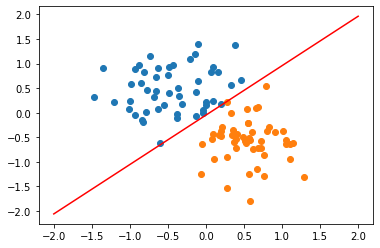

In [13]:
plot_fit("Trained Model")

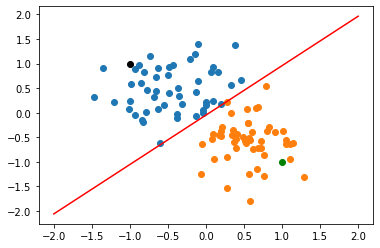

Red point positive probability = 0.9424158334732056
Black point positive probability = 0.05055497586727142
Red point belongs in class 1
Black point belongs in class = 0


In [17]:
point1 = torch.tensor([1.0, -1.0])
point2 = torch.tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'go')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')
plot_fit("Trained Model")

print("Red point positive probability = {}".format(model.forward(point1).item())) 
print("Black point positive probability = {}".format(model.forward(point2).item())) 
print("Red point belongs in class {}".format(model.predict(point1))) 
print("Black point belongs in class = {}".format(model.predict(point2))) 